In [5]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

def check_NaN(dataframe):
    print("Total NaN:", dataframe.isnull().values.sum())
    print("NaN by column:\n",dataframe.isnull().sum())
    return

In [9]:
data = pd.read_csv("./data/Plants_Dataset.csv")
data.head()
#data.describe()

,Site,height,mouth_diam,tube_diam,keel_diam,wingspread,hoodarea,wingarea,tubearea,tubemass_g,wingmass_g,Ca_ppm,P_ppm,K_ppm,Mg_ppm,C_pct,H_pct,N_pct
0,TJH,654,38.4,16.6,6.4,55,63.77,33.65,87.15,3.54,0.29,717.90,997.12,10699.50,1983.40,49.43,5.50,0.93
1,TJH,413,22.2,17.2,5.9,60,21.10,7.36,44.78,1.48,0.06,392.74,876.99,9576.49,1540.73,50.24,5.63,0.94
2,TJH,610,31.2,19.9,6.7,78,28.47,15.75,56.64,2.20,0.16,402.45,1287.62,11738.73,1514.21,50.77,5.58,1.08
3,TJH,546,34.4,20.8,6.3,95,48.82,30.47,76.31,2.95,0.24,497.16,662.55,11173.37,1399.24,50.27,5.67,0.88
4,TJH,665,30.5,20.4,6.6,30,29.48,11.33,100.22,3.36,0.08,504.48,1115.53,7017.39,1964.15,50.20,5.56,0.98


In [11]:
#data.features = data[[columns[best_f1],columns[best_f2]]]
data.features = data[['H_pct','N_pct']]
data.features.head()

C:\Users\reeve\AppData\Local\Temp\ipykernel_25540\915207678.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.features = data[['H_pct','N_pct']]


,H_pct,N_pct
0,5.50,0.93
1,5.63,0.94
2,5.58,1.08
3,5.67,0.88
4,5.56,0.98


In [17]:
data.features = preprocessing.MinMaxScaler().fit_transform(data.features)
data.target = data.Site
data.target.head()

C:\Users\reeve\AppData\Local\Temp\ipykernel_25540\1447708399.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.target = data.Site


0    TJH
1    TJH
2    TJH
3    TJH
4    TJH
Name: Site, dtype: object

In [65]:
#Convert column strings to ID of string
#data['site_id'] = pd.factorize(data['Site'])[0]
#print(data['site_id'])
#data.head()

#Convert column strings to array of unique items
targets_list = data['Site'].unique()
print(targets_list)

['TJH' 'DG' 'LEH' 'HD']


In [111]:
x_train, x_test, y_train, y_test = train_test_split(data.features,data.target, test_size=0.2,random_state=42)

In [113]:

from sklearn.model_selection import cross_val_predict

#Run the classifier with optimal K
classifier = KNeighborsClassifier(5)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

# Return the predictions for the 3-Fold crossvalidation
y_predicted = cross_val_predict(classifier, x_train,y_train, cv=3)

In [115]:
print(x_test)

[[0.39285714 0.06185567]
 [0.19642857 0.15463918]
 [0.26190476 0.24742268]
 [0.42857143 0.17525773]
 [0.20238095 0.13402062]
 [0.31547619 0.1443299 ]
 [0.07142857 0.11340206]
 [0.44047619 0.75257732]
 [0.23214286 0.20618557]
 [0.01190476 0.17525773]
 [0.32738095 0.2371134 ]
 [0.33928571 0.        ]
 [0.55952381 0.21649485]
 [0.23809524 0.09278351]
 [0.42857143 0.30927835]
 [0.05952381 0.27835052]]


In [129]:
print(y_test)

30     DG
0     TJH
22    TJH
31     DG
18    TJH
28     DG
10    TJH
70     HD
4     TJH
12    TJH
49     DG
33     DG
67    LEH
35     DG
68    LEH
45     DG
Name: Site, dtype: object


In [147]:
print(type(y_test))
y_test.head()

<class 'pandas.core.series.Series'>


30     DG
0     TJH
22    TJH
31     DG
18    TJH
Name: Site, dtype: object

In [149]:
y_test_int = pd.factorize(y_test)[0]
print(y_test_int)

[0 1 1 0 1 0 1 2 1 1 0 0 3 0 3 0]


In [175]:
#print(y_test['Site'])

In [197]:
y_test_int = np.array(y_test_int, dtype=float)
#print(y_test_int)
sr = pd.Series(y_test_int)
#print(sr)
y_test.Site = sr
y_test.replace([0], 'aAAAAAAAAA')
print(y_test)

30     DG
0     TJH
22    TJH
31     DG
18    TJH
28     DG
10    TJH
70     HD
4     TJH
12    TJH
49     DG
33     DG
67    LEH
35     DG
68    LEH
45     DG
Name: Site, dtype: object


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

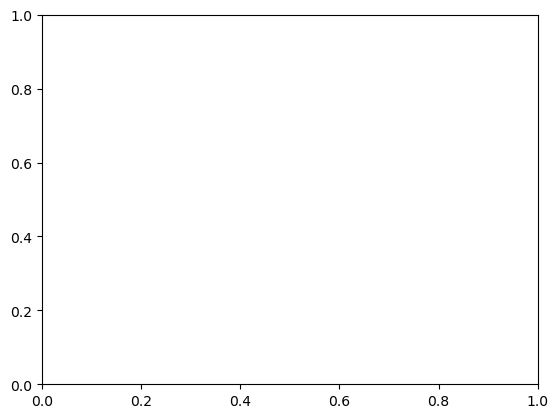

In [161]:
from matplotlib.colors import *
from matplotlib import pyplot as plt


xs, ys = x_test, sr

X1, X2 = np.meshgrid(np.arange(start = xs[:,0].min() - 1,stop = xs[:,0].max() + 1,step = 0.01),
                     np.arange(start = xs[:,1].min() - 1,stop = xs[:,1].max() + 1,step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(['orange','grey']))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i, j in enumerate(np.unique(ys)):
    plt.scatter(xs[ys==j,0],xs[ys==j,1],
                c=ListedColormap(['orange','grey'])(i),label = j)

plt.title('Train Set')
plt.xlabel('Estimated Salary')
plt.ylabel('Age')
plt.legend()
plt.show()